#Homework 4: Fraud Detection

*In this homework, you are going to work with a credit card transaction dataset.*

**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw4`</font>.

2. Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

3. **Do not delete your outputs. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed in the notebook.**

4. When you're done, please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


*   Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
*   Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.

For any question, you may send an email to the TAs and LAs.

---

In this homework, you will work on a dataset about credit card frauds.

For this homework, you will use the provided file `fraud_data.csv`. Feature engineering had already been applied to the dataset and informative features created. Names of these features are hidden for secrecy purposes. There is no missing value in the data.

Below, you can find all the set of features, provided in the dataset:
*   **Known Features**
    * transaction_id	
    * day	
    *	amount
    *	card 


*   **Other Features**
    * feature0 . . . feature23

*   **Target**
    * label (True: Fraudalent Transaction, False: Non-Fraudalent Transaction)
    

    
*Do not forget to add the shared `fraud_data.csv` file to your drive and mount to your drive. Otherwise, you won't be able to read the file.*

In [1]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
filename = "fraud_data.csv"
df = pd.read_csv(join(path_prefix, filename), index_col=0)

df.head()


,transaction_id,day,amount,card,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,label
0,861163,11,4.14,2105835,-430.764171,-320.015845,-126.521888,62.573045,101.190832,-19.647190,-13.328663,3.536347,-12.885088,1.575640,-0.879015,-1.013924,-2.195600,-0.335761,-0.566656,0.133997,-0.112530,0.133236,0.061701,-0.040570,-0.131249,-0.016216,0.001330,-0.000022,False
1,481857,7,102.58,3595939,-435.431389,-322.187188,-13.951082,-6.550536,-119.609051,4.658029,-3.273450,3.490142,9.482249,17.858529,-0.554083,0.126893,-0.220055,0.022814,-0.103251,-0.788776,0.332418,0.997110,-0.172463,0.032128,-0.073120,-0.000139,-0.002084,-0.000290,False
2,1215246,16,116.98,5953735,-434.424026,-330.553462,-18.809262,41.065894,74.053132,107.341293,-10.219304,3.182406,2.985591,-0.833696,-0.149106,0.001384,-0.605515,-0.194779,0.436881,-1.341081,0.527236,-1.071288,0.207154,0.059550,1.247738,-0.217314,0.075597,-0.000344,False
3,793548,11,59.90,1298385,-442.129375,632.447065,330.925334,-264.756853,-6.839567,48.566958,4.905629,-15.643984,-4.170122,-0.928957,-1.944994,1.173714,0.142302,-1.038035,1.041172,0.816854,-0.418644,0.152984,0.253243,0.006046,-0.016408,-0.004193,-0.020025,0.000004,False
4,4307,1,138.00,5029495,-405.270687,-303.103313,-253.927088,-38.299339,-117.636587,-8.799181,-2.525076,-16.500900,-12.269734,1.010618,0.759805,4.383355,0.442175,0.522420,-1.306245,0.954463,1.138813,-0.145031,0.701119,-0.997044,-0.077150,-0.008464,0.000779,0.000138,False


## Ratio Between Fraudalent and Non-Fraudalent Transactions (5 Points)


The dataset is imbalanced so that non-frauds are dominant in the data. In this part you are asked to plot a pie chart and show the ratio between fraudalent and non-fraudalent transactions. Your output should be like: 

![](https://i.ibb.co/nRYRxrt/raito-label.png)

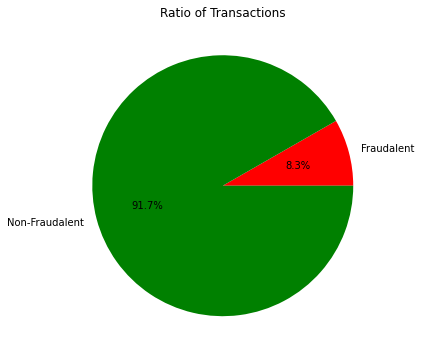

In [4]:
#your code
falseamount=df[df["label"]==False].value_counts().sum()
trueamount=df[df["label"]==True].value_counts().sum()
amountlist=[trueamount,falseamount]
mylabels=["Fraudalent","Non-Fraudalent"]

fig = plt.figure(figsize =(8, 6))
plt.pie(amountlist,labels=mylabels,colors=["r","g"],autopct='%1.1f%%')
plt.title("Ratio of Transactions")
plt.show()

## Split the data into train (70%), validation (15%) and test (15%). (5 Points)

Use `train_test_split` with `random_state` parameter set to 0. Drop `transaction_id` and 	`card` columns since they dont give any information.

*Do not forget that the data is imbalanced so you should handle that with stratified splitting.*

In [5]:
#your code
from sklearn.model_selection import train_test_split
X=df.drop(["transaction_id","card","label"],axis=1)
y=df["label"]
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.30, random_state=0,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=0,stratify=y_remaining)


## Train a Default Random Forest Model (Baseline) (5 Points)

Remember that the dataset is imbalanced. So here, you are expexted to handle this imbalance issue by giving more weight for the minority class. 

***Hint:*** *You can consider changing the class weight for the model since the data is imbalanced.*

In [6]:
from sklearn.ensemble import RandomForestClassifier
#your code
model_rf = RandomForestClassifier(n_estimators=100, random_state=0,class_weight="balanced")
model_rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=0)

## Evaluate the Baseline Model (30 Points)

There are some functions below already imported for you. You can use those functions to find results but of course there are other ways too. Those are given for you to give hints. 

### Plot Confusion Matrix (10 Points)

In this part you are asked to plot the Confusion Matrix of the Baseline Model for the predictions made on the validation data. Your output should be similar to: 

![](https://i.ibb.co/gwmCszd/conf-eval.png)

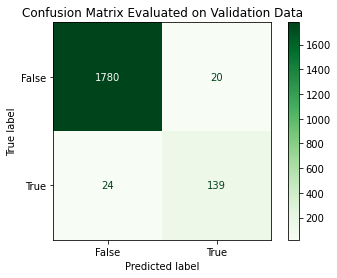

In [7]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
#your code
plot_confusion_matrix(model_rf,X_val, y_val, cmap="Greens")
plt.title("Confusion Matrix Evaluated on Validation Data")
plt.show()

### Plot ROC Curve Evaluated on Validation Data (10 Points)

In this part you are asked to plot ROC curve of the model's output on the validation data. Your output should be similar to: 

![](https://i.ibb.co/z5BFJxF/roc-val.png)



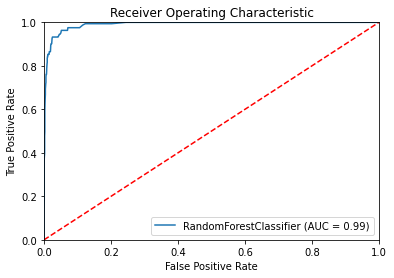

In [8]:
from sklearn.metrics import RocCurveDisplay,roc_curve,auc
#your code
val_predict = model_rf.predict_proba(X_val)
predicted_prob=val_predict[::,1]
fpr, tpr, thresholds =roc_curve(y_val, predicted_prob) 
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'RandomForestClassifier (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Receiver Operating Characteristic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Plot Precision-Recall Curve (10 Points)

In this part, you are asked to plot precision-recall curve of the model using validation data. Your output should be similar to: 

![](https://i.ibb.co/xC5KXXz/pre-recall-val.png)

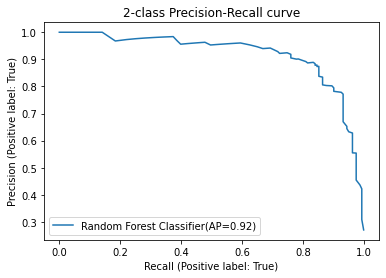

In [9]:
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve,average_precision_score
#your code
precision_v, recall_v, thresholds = precision_recall_curve(y_val, predicted_prob)
average_precision = average_precision_score(y_val, predicted_prob)

plt.plot(recall_v,precision_v,label="Random Forest Classifier(AP=%0.2f)" %average_precision)
plt.legend(loc = 'lower left')
plt.title("2-class Precision-Recall curve")
plt.xlabel("Recall (Positive label: True)")
plt.ylabel("Precision (Positive label: True)")
plt.show()

## Hyperparameter Tuning (20 Points)

Now that you trained the default model and see the results, it is time to make it better with hyperparameter tuning. To evaluate the model performances you need to use AUPRC(Area Under Precision-Recall Curve). To this end, store AUPRC values for each model then decide which parameters are the best to use.

Here, you are asked to tune hyperparameters in two steps. 

**Step 1:**  \\
In the first step, train different models only changing number of estimators. Then plot `n_estimators` vs AUPRC scores using validation data. 

Use the following values for this step:
```
'n_estimators': [50,100,200,300,500,750]
```
**Step 2:** \\
In the second step, train different models only changing max_features values. Then plot `max_features` vs AUPRC scores using validation data. You should use the best value for the `n_estimators` that you obtained in the first step.

Use the following values for this step:
```
'max_features': [3,5,7,10,15,20,25]
```

**Remember that positive class is fraudalent ones.**

Your plots should look like below. Remember these plots are based on random allocations so it is highly possible that the values you get will not be exactly the same. However, structures should be the same.

<img src="https://i.ibb.co/HVWmtvg/Screen-Shot-2021-12-13-at-18-20-45.png" alt="drawing" width="400"/>


*Set your y-axis limits between 0.8 and 1 to have similar plots.*





In [10]:
from sklearn.metrics import auc, precision_recall_curve
#you can use auc function to calculate the area under a curve
#STEP1
n_estimators= [50,100,200,300,500,750]
est_auc_list=[]
max_pred=0
max_est=0
for est in n_estimators:
  model_rf = RandomForestClassifier(n_estimators=est,random_state=0,class_weight="balanced")
  model_rf.fit(X_train, y_train)
  
  preds = model_rf.predict_proba(X_val) 
  predicted_prob2= preds[:,1]
  precision_v2, recall_v2, thresholds = precision_recall_curve(y_val, predicted_prob2)
  roc_auc = auc(recall_v2,precision_v2)
  est_auc_list.append(roc_auc)

  if  max_pred < roc_auc:
    max_pred=roc_auc
    max_est=est
  print("n_estimators", est, ", AUPRC score: ", roc_auc)

print("\nThe best value for the n_estimators:",max_est,"\n")

#STEP2
max_feature= [3,5,7,10,15,20,25]
max_pred2=0
feat_roc_list=[]
max_f=0
for feature in max_feature:
  model_rf = RandomForestClassifier(n_estimators=max_est,random_state=0,max_features=feature,class_weight="balanced")
  model_rf.fit(X_train, y_train)
  
  preds = model_rf.predict_proba(X_val)
  predicted_prob2= preds[::,1]
  precision_v2, recall_v2, thresholds = precision_recall_curve(y_val, predicted_prob2)
  roc_auc2 = auc(recall_v2,precision_v2)

  feat_roc_list.append(roc_auc2)
  if  max_pred2 <  roc_auc2:
    max_pred2= roc_auc2
    max_f=feature
  print("max_feature", feature, ",  AUPRC score: ",  roc_auc2)
print("\nThe best value for the max_features:",max_f,"\n")

n_estimators 50 , AUPRC score:  0.9168861861434356
n_estimators 100 , AUPRC score:  0.9191109032558795
n_estimators 200 , AUPRC score:  0.9190661391611713
n_estimators 300 , AUPRC score:  0.9221284907779723
n_estimators 500 , AUPRC score:  0.9227998527668357
n_estimators 750 , AUPRC score:  0.9225452209044408

The best value for the n_estimators: 500 

max_feature 3 ,  AUPRC score:  0.9250484303976703
max_feature 5 ,  AUPRC score:  0.9227998527668357
max_feature 7 ,  AUPRC score:  0.9190947124391043
max_feature 10 ,  AUPRC score:  0.9182118545165221
max_feature 15 ,  AUPRC score:  0.9111880675622333
max_feature 20 ,  AUPRC score:  0.912130569103302
max_feature 25 ,  AUPRC score:  0.9093361845252514

The best value for the max_features: 3 



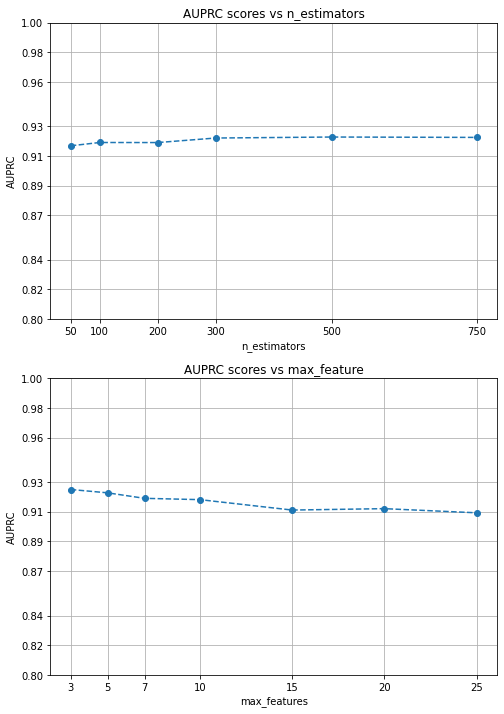

In [11]:
fig, ax = plt.subplots(2,1,figsize=(8, 12))
yticks=np.around(np.linspace(0.8,1,num=10),decimals=2)

ax[0].plot(n_estimators,est_auc_list,linestyle='dashed', marker='o')
ax[0].set_xticks(n_estimators)
ax[0].set_yticks(yticks)
ax[0].grid(True)
ax[0].set_title("AUPRC scores vs n_estimators")
ax[0].set_xlabel("n_estimators")
ax[0].set_ylabel("AUPRC")

ax[1].plot(max_feature,feat_roc_list,linestyle='dashed', marker='o')
ax[1].set_yticks(yticks)
ax[1].set_xticks(max_feature)
ax[1].grid(True)
ax[1].set_title("AUPRC scores vs max_feature")
ax[1].set_xlabel("max_features")
ax[1].set_ylabel("AUPRC")
plt.show()

## Retrain the Model with the Best Parameters (5 Points)

Here you should retrain the random forest model with train and validation data combined using the best parameters you get from the hyperparameter tuning.

In [12]:
#your code
retrain_model_rf = RandomForestClassifier(n_estimators=max_est,random_state=0,max_features=max_f,class_weight="balanced")
retrain_model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=3,
                       n_estimators=500, random_state=0)

## Evaluate the Final Model using Test data (30 Points)

Here, you are asked to evaluate the final model using the test data. Follow the same steps that you followed while evaluating the dafault model.

### Plot Confusion Matrix (10 Points)

Output should be like:

![](https://i.ibb.co/YBK9S8J/conf-mat-test.png)

*Please keep in mind that this confusion matrix might be different than what you will get.*

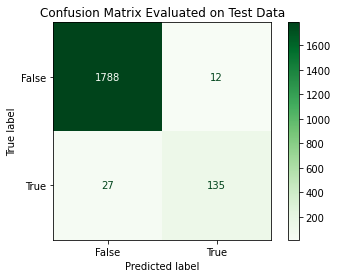

In [13]:
#your 
plot_confusion_matrix(retrain_model_rf,X_test, y_test, cmap="Greens")
plt.title("Confusion Matrix Evaluated on Test Data")
plt.show()

### Plot ROC Curve Evaluated on Test Data (10 Points)

Output should be like:

![](https://i.ibb.co/59drzBm/roc-test.png)

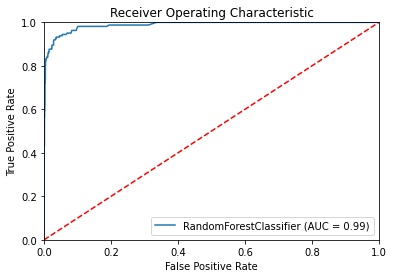

In [15]:
#your code
val_predict = retrain_model_rf.predict_proba(X_test)
predicted_prob=val_predict[::,1]
fpr, tpr, thresholds =roc_curve(y_test, predicted_prob) 
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'RandomForestClassifier (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Receiver Operating Characteristic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Plot Precision-Recall Curve (10 Points)

Uutput should be similar to: 

![](https://i.ibb.co/xC5KXXz/pre-recall-val.png)

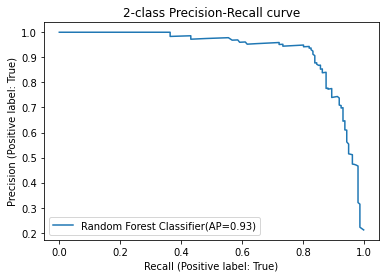

In [16]:
precision_v, recall_v, thresholds = precision_recall_curve(y_test, predicted_prob)
average_precision = average_precision_score(y_test, predicted_prob)

plt.plot(recall_v,precision_v,label="Random Forest Classifier(AP=%0.2f)" %average_precision)
plt.legend(loc = 'lower left')
plt.title("2-class Precision-Recall curve")
plt.xlabel("Recall (Positive label: True)")
plt.ylabel("Precision (Positive label: True)")
plt.show()